In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import io

In [0]:
import pandas as pd
import io

col_names = ["date", "views", "tags", "title", "text"]
df = pd.read_csv('drive/My Drive/Colab Notebooks/956-1010.csv', sep = ";", names=col_names)

In [250]:
df.head()

,date,views,tags,title,text
0,06.01.2017 05:07,8146,#новости #турция #канада #вмире,Гражданка Канады арестована в Турции за оскорб...,В Турции за критику президента Реджепа Тайипа ...
1,06.01.2017 04:16,622,#новости #происшествия #москва #дтп,Audi врезался в припаркованные автомобили на ю...,В ночь на 6 января на юго-востоке Москвы инома...
2,06.01.2017 05:30,10529,#новости #сша #вмире #цру,WP: Переходную команду Трампа покинул бывший д...,Из переходной команды избранного президента СШ...
3,06.01.2017 06:03,19123,#новости #вмире #сша #россия #разведка,СМИ: Распространяемые Россией фейковые новости...,Американские спецслужбы назвали многогранной к...
4,06.01.2017 06:02,18269,#новости #вмире #япония #южнаякорея,Япония оскорбилась из-за памятника в Южной Кор...,Власти Японии приняли решение временно отозват...


In [251]:
df['text'][0]

'В Турции\xa0за критику президента Реджепа Тайипа Эрдогана арестована гражданка Канады, 50-летняя Иси Хипер.Как сообщает\xa0The Canadian Press, полиция арестовала Хипер в городе Карс на северо-востоке Турции 30 декабря. Причиной стал её пост в Facebook, где она обвинила Эрдогана в аресте журналистов, заявлявших, что у них есть доказательства того, что Турция поддерживает ИГИЛ*. Об этом заявила адвокат арестованной женщины\xa0Биргитта Павич.Хипер имеет двойное гражданство —\xa0канадское и турецкое. В Турции она проживает несколько месяцев, после того, как переехала в эту страну после знакомства с местным мужчиной\xa0—\xa0курдом.Сообщается, что за оскорбление президента ей грозит до трёх лет лишения свободы.\xa0В МИД Канады сообщили, что знают о задержании своей гражданки и оказывают ей необходимую консульскую помощь.* Организация запрещена на территории РФ\xa0по решению Верховного суда'

In [252]:
df.shape

(42839, 5)

In [0]:
def flatten(column):
  return pd.Series([x for lst in column for x in lst])

In [0]:
tags = df.tags.str.replace("#", "").str.split(" ")

In [255]:
tags

0                         [новости, турция, канада, вмире]
1                     [новости, происшествия, москва, дтп]
2                               [новости, сша, вмире, цру]
3                  [новости, вмире, сша, россия, разведка]
4                     [новости, вмире, япония, южнаякорея]
                               ...                        
42834                [новости, пожары, москва, иностранцы]
42835     [спорт, новости, криштиануроналду, фкреалмадрид]
42836                   [новости, вмире, сша, джонмаккейн]
42837    [life78, происшествия, угрозывзрыва, угрозы, п...
42838       [армия, минобороны, курсанты, соцсети, архивы]
Name: tags, Length: 42839, dtype: object

In [0]:
#pop_tag_list = flatten(tags).value_counts()[2:15]

In [0]:
pop_tag_list = ['происшествия', 'life78', 'сша', 'регионы', 'украина', 'москва', 'вау', 'спорт', 'дональдтрамп', 'технологии']

In [0]:
index_list = []
idx = 0
for tag in tags:
  for i in tag:
    if i in list(pop_tag_list):
      index_list.append(idx)
  idx += 1
index_list = list(set(index_list))

In [258]:
index_list[:5]

[1, 2, 3, 5, 6]

In [0]:
df_new = df.query("index in @index_list")

In [260]:
df_new.head()

,date,views,tags,title,text
1,06.01.2017 04:16,622,#новости #происшествия #москва #дтп,Audi врезался в припаркованные автомобили на ю...,В ночь на 6 января на юго-востоке Москвы инома...
2,06.01.2017 05:30,10529,#новости #сша #вмире #цру,WP: Переходную команду Трампа покинул бывший д...,Из переходной команды избранного президента СШ...
3,06.01.2017 06:03,19123,#новости #вмире #сша #россия #разведка,СМИ: Распространяемые Россией фейковые новости...,Американские спецслужбы назвали многогранной к...
5,06.01.2017 06:14,16666,#новости #сша #мексика #вмире #мигранты,Трамп решил не обременять Мексику расходами по...,Избранный президент США Дональд Трамп решил не...
6,06.01.2017 06:21,31170,#новости #джобайден #сша #вмире #хакеры #спецс...,"Байден похвалился ""тайными операциями"", которы...","Вице-президент США Джо Байден заявил, что тайн..."


In [261]:
df_new.shape

(26926, 5)

In [0]:
tags_list = list(df_new.tags)

In [263]:
len(tags_list)

26926

In [0]:
title_list = list(df_new.title)

In [265]:
len(title_list)

26926

In [0]:
sentences = [[sent for sent in text.split(".")] for text in df_new['text'] if type(text) != float]

In [0]:
sentences1 = []
for text in df_new['text']:
  if type(text) != float:
    s = []
    for sent in text.split("."):
      s.append(sent)
  sentences1.append(s)

In [268]:
sentences1[0:5]

[['В ночь на 6 января на юго-востоке Москвы\xa0иномарка Audi на полной скорости врезалась в припаркованные на улице\xa0Батайской автомобили',
  '\xa0По предварительной информации, водитель не справился с управлением на скользкой дороге и допустил столкновение с двумя припаркованными машинами, в которых, к счастью, никого не было',
  '\xa0Очевидцы ДТП вызвали бригаду скорой помощи, которая увезла в больницу получивших тяжёлые травмы водителя и пассажира Audi',
  'Сейчас на месте работают сотрудники полиции, которые восстанавливают картину произошедшего и разбираются в возможных причинах аварии',
  ''],
 ['Из переходной команды\xa0избранного президента США Дональда Трампа ушёл экс-директор\xa0ЦРУ Джеймс Вулси',
  ' — С немедленным вступлением в\xa0силу: Джеймс Вулси больше не\xa0является старшим советником избранного президента Трампа или\xa0его переходной команды',
  ' Он желает избранному президенту и\xa0его администрации успехов в\xa0работе,\xa0— гласит текст заявления представителя э

In [269]:
len(sentences)

26502

In [270]:
len(sentences1)

26926

In [0]:
l = []
l_tags = []
l_titles = []
for i, j, u in zip(sentences1, tags_list, title_list):
  l += i
  for y in range(len(i)):
    l_tags.append(j)
  for a in range(len(i)):
    l_titles.append(u)

In [272]:
len(l_tags)

248022

In [273]:
len(l_titles)

248022

In [274]:
l_tags[:20]

['#новости #происшествия #москва #дтп',
 '#новости #происшествия #москва #дтп',
 '#новости #происшествия #москва #дтп',
 '#новости #происшествия #москва #дтп',
 '#новости #происшествия #москва #дтп',
 '#новости #сша #вмире #цру',
 '#новости #сша #вмире #цру',
 '#новости #сша #вмире #цру',
 '#новости #сша #вмире #цру',
 '#новости #сша #вмире #цру',
 '#новости #сша #вмире #цру',
 '#новости #сша #вмире #цру',
 '#новости #вмире #сша #россия #разведка',
 '#новости #вмире #сша #россия #разведка',
 '#новости #вмире #сша #россия #разведка',
 '#новости #вмире #сша #россия #разведка',
 '#новости #вмире #сша #россия #разведка',
 '#новости #вмире #сша #россия #разведка',
 '#новости #вмире #сша #россия #разведка',
 '#новости #вмире #сша #россия #разведка']

In [275]:
l_titles[:10]

['Audi врезался в припаркованные автомобили на юго-востоке Москвы',
 'Audi врезался в припаркованные автомобили на юго-востоке Москвы',
 'Audi врезался в припаркованные автомобили на юго-востоке Москвы',
 'Audi врезался в припаркованные автомобили на юго-востоке Москвы',
 'Audi врезался в припаркованные автомобили на юго-востоке Москвы',
 'WP: Переходную команду Трампа покинул бывший директор ЦРУ Джеймс Вулси',
 'WP: Переходную команду Трампа покинул бывший директор ЦРУ Джеймс Вулси',
 'WP: Переходную команду Трампа покинул бывший директор ЦРУ Джеймс Вулси',
 'WP: Переходную команду Трампа покинул бывший директор ЦРУ Джеймс Вулси',
 'WP: Переходную команду Трампа покинул бывший директор ЦРУ Джеймс Вулси']

In [276]:
len(l)

248022

In [0]:
list_sent = [sent.replace("\xa0", " ").lower() for sent in l if sent != " " or sent != ""]

In [278]:
list_sent[:10]

['в ночь на 6 января на юго-востоке москвы иномарка audi на полной скорости врезалась в припаркованные на улице батайской автомобили',
 ' по предварительной информации, водитель не справился с управлением на скользкой дороге и допустил столкновение с двумя припаркованными машинами, в которых, к счастью, никого не было',
 ' очевидцы дтп вызвали бригаду скорой помощи, которая увезла в больницу получивших тяжёлые травмы водителя и пассажира audi',
 'сейчас на месте работают сотрудники полиции, которые восстанавливают картину произошедшего и разбираются в возможных причинах аварии',
 '',
 'из переходной команды избранного президента сша дональда трампа ушёл экс-директор цру джеймс вулси',
 ' — с немедленным вступлением в силу: джеймс вулси больше не является старшим советником избранного президента трампа или его переходной команды',
 ' он желает избранному президенту и его администрации успехов в работе, — гласит текст заявления представителя экс-главы разведывательного ведомства',
 'как 

In [0]:
# соединяем в одну табличку
#df_sent = np.concatenate((np.array(list_sent).reshape(len(l), 1), np.array(l_tags).reshape(len(l), 1), np.array(l_titles).reshape(len(l), 1)), axis = 1)

In [0]:
k = 0
list_k = []
for i in list_sent:
  if len(i) < 4:
    #list_sent.remove(i)
    list_k.append(k)
  k += 1

In [280]:
len(list_sent)

248022

In [281]:
len(list_k)

29833

In [282]:
list_k[:10]

[4, 11, 17, 20, 35, 43, 57, 68, 93, 103]

In [0]:
k = 0
l_tags_new, l_titles_new, l_sent_new = [], [], []
for _ in range(len(l_tags)):
  if not k in list_k:
    l_tags_new.append(l_tags[k])
    l_titles_new.append(l_titles[k])
    l_sent_new.append(list_sent[k])
  k += 1

In [284]:
len(l_titles_new)

218189

In [285]:
l_sent_new[:10]

['в ночь на 6 января на юго-востоке москвы иномарка audi на полной скорости врезалась в припаркованные на улице батайской автомобили',
 ' по предварительной информации, водитель не справился с управлением на скользкой дороге и допустил столкновение с двумя припаркованными машинами, в которых, к счастью, никого не было',
 ' очевидцы дтп вызвали бригаду скорой помощи, которая увезла в больницу получивших тяжёлые травмы водителя и пассажира audi',
 'сейчас на месте работают сотрудники полиции, которые восстанавливают картину произошедшего и разбираются в возможных причинах аварии',
 'из переходной команды избранного президента сша дональда трампа ушёл экс-директор цру джеймс вулси',
 ' — с немедленным вступлением в силу: джеймс вулси больше не является старшим советником избранного президента трампа или его переходной команды',
 ' он желает избранному президенту и его администрации успехов в работе, — гласит текст заявления представителя экс-главы разведывательного ведомства',
 'как сообщ

In [0]:
import numpy as np

lt = np.array(l_tags_new).reshape(len(l_tags_new), 1)
ltit = np.array(l_titles_new).reshape(len(l_titles_new), 1)

In [0]:
df_t = np.concatenate((lt, ltit), axis = 1)

In [0]:
df_tags = pd.DataFrame(df_t)
df_tags.to_csv("file_tags_titles.csv", sep=",")

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(l_sent_new)]

In [0]:
len(tagged_data)

218189

In [0]:
max_epochs = 15
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size, alpha=alpha, min_alpha=0.00025, min_count=1, dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_100.model")
print("Model Saved")

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


In [0]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")

In [0]:
#to find the vector of a document which is not in training data
test_data = word_tokenize("Я люблю кошек".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

V1_infer [ 0.07819464 -0.05504467  0.01134583 -0.00768014  0.04940945 -0.01955327
  0.00623166 -0.04697635  0.00557894  0.00634767 -0.02616776 -0.04664804
  0.02744735 -0.00952065  0.00017852  0.02709353 -0.00639337 -0.00415342
 -0.03302771  0.01566984 -0.01276171  0.01185275  0.04202527 -0.01451433
 -0.05091232  0.03829421 -0.0249161   0.0006452  -0.00566708  0.10176733
 -0.05422423 -0.02937377  0.03453519  0.01610894  0.02078198 -0.02908051
  0.0764882   0.04902814  0.00728264  0.00680764  0.01261978  0.02589892
  0.03096634 -0.05052154 -0.02688544 -0.00971019  0.06936277 -0.07102412
 -0.06927816  0.01612476  0.02635934 -0.03031285  0.11608636  0.03045389
 -0.02856622 -0.04277442 -0.03096242 -0.02333017  0.05628459  0.00576372
 -0.01356358 -0.00346737 -0.01571956  0.00946299  0.04765396  0.03599321
  0.08211751 -0.02603908  0.00949216 -0.00841434  0.00333534  0.00321389
 -0.02084816 -0.05866619  0.07378982 -0.00321795  0.00164687  0.03851885
  0.01124198  0.03805237 -0.01900677  0.01

In [0]:
vectors_list = []
for sent in l_sent_new:
  test_data = word_tokenize(sent.lower())
  vectors_list.append(model.infer_vector(test_data))

In [0]:
len(vectors_list)

218189

In [0]:
import numpy as np

np.array(vectors_list, dtype=object)

array([[-0.046124815940856934, 0.055397022515535355,
        -0.05073308199644089, ..., 0.031447622925043106,
        -0.10403124243021011, -0.03267328813672066],
       [0.06971495598554611, -0.08035627752542496, 0.02087082900106907,
        ..., -0.027525128796696663, -0.05809721350669861,
        -0.01990998163819313],
       [-0.09477605670690536, 0.08610562235116959, -0.04308586195111275,
        ..., -0.025146864354610443, -0.07502441108226776,
        -0.10338996350765228],
       ...,
       [-0.047471001744270325, -0.11696313321590424,
        -0.00343230739235878, ..., -0.04161486774682999,
        -0.17139765620231628, -0.10189928114414215],
       [-0.02747618779540062, -0.02455909363925457, 0.018611811101436615,
        ..., 0.037845201790332794, -0.1055387333035469,
        0.005216994322836399],
       [0.05782205983996391, 0.007226523477584124, 0.1077890619635582,
        ..., -0.14321202039718628, -0.030990149825811386,
        0.010069209150969982]], dtype=object)

In [0]:
pd.DataFrame(vectors_list).to_csv("file_vectors.csv", sep=",")

# Визуализация

In [0]:
import numpy as np
import pandas as pd

X = pd.read_csv('drive/My Drive/Colab Notebooks/file_vectors.csv', sep = ",")

In [288]:
X.shape

(218189, 101)

In [0]:
X_ = X.drop(('Unnamed: 0'), axis = 1)

In [0]:
t = pd.read_csv('drive/My Drive/Colab Notebooks/file_tags_titles.csv', sep = ",") #names = ["Unnamed: 0", "tag", "title"])

In [0]:
t_ = t.drop(('Unnamed: 0'), axis = 1)

In [292]:
t_.shape

(218189, 2)

In [0]:
df = pd.concat([t_, X_], axis = 1)

In [294]:
df.head(n=20)

,0,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,#новости #происшествия #москва #дтп,Audi врезался в припаркованные автомобили на ю...,-0.046125,0.055397,-0.050733,-0.009592,-0.073423,0.165708,-0.138261,-0.173501,-0.189619,0.146183,0.245423,-0.047195,0.046043,0.112371,0.012275,0.284471,-0.043771,0.045525,-0.286133,-0.180133,0.260820,-0.129936,-0.105734,-0.180031,0.201198,0.269458,-0.048292,-0.295275,0.132261,0.117075,-0.190876,-0.377334,0.062921,-0.156311,0.254029,-0.062091,0.157924,-0.102172,...,-0.127852,0.248266,-0.033418,-0.152591,0.272222,-0.067729,-0.071489,-0.095698,0.186673,-0.105401,0.006629,-0.414734,0.020430,-0.229163,-0.134604,-0.086272,-0.031996,-0.124139,-0.342022,0.094388,0.064279,0.122989,0.280763,0.055147,-0.091069,0.116918,0.131026,-0.113741,0.079821,0.158558,0.079424,0.229558,0.276692,0.668372,-0.366572,0.004066,-0.286583,0.031448,-0.104031,-0.032673
1,#новости #происшествия #москва #дтп,Audi врезался в припаркованные автомобили на ю...,0.069715,-0.080356,0.020871,0.100201,0.137488,0.160975,-0.333634,-0.265981,-0.212294,0.204478,0.317802,-0.048788,0.180861,0.093198,-0.011668,0.316611,-0.013087,0.075691,-0.059725,-0.050690,0.149158,-0.017717,-0.202533,0.056725,0.232115,0.311488,0.063972,-0.361655,0.169391,0.054616,-0.182032,-0.428895,-0.004163,-0.097117,0.160584,0.032226,0.076001,-0.142760,...,-0.095568,0.206214,-0.181810,-0.051687,0.271324,-0.133411,-0.064881,-0.041232,0.215791,-0.071797,-0.017027,-0.413542,0.009145,-0.047450,-0.106077,-0.170370,-0.008831,-0.194681,-0.245009,0.190829,0.096824,0.003448,0.142069,0.113924,-0.112355,0.072486,0.193662,-0.137189,-0.073772,0.183182,0.017826,0.230299,0.168218,0.650053,-0.537923,-0.095123,-0.129240,-0.027525,-0.058097,-0.019910
2,#новости #происшествия #москва #дтп,Audi врезался в припаркованные автомобили на ю...,-0.094776,0.086106,-0.043086,-0.006030,0.080063,0.095446,-0.095473,-0.082818,-0.102423,0.041356,0.227393,0.055313,0.070316,0.072876,-0.088199,0.169339,-0.105868,-0.051341,-0.065937,-0.114667,0.271949,-0.147678,-0.125983,-0.123802,0.072908,0.236880,0.027240,-0.130742,0.120971,0.010667,-0.248518,-0.389526,0.073138,-0.116792,0.053505,0.102551,0.132690,-0.156345,...,-0.049043,0.200691,-0.246466,-0.016934,0.224104,-0.076675,0.001540,-0.032173,0.189826,-0.064335,-0.042855,-0.334756,0.070744,-0.094380,-0.098006,-0.206735,0.054999,-0.146086,-0.241582,-0.006741,0.145479,0.105813,0.044863,0.137802,-0.041384,0.074164,0.179500,-0.062863,-0.053090,0.099740,0.121375,0.263140,0.049085,0.452271,-0.278141,-0.049213,-0.068240,-0.025147,-0.075024,-0.103390
3,#новости #происшествия #москва #дтп,Audi врезался в припаркованные автомобили на ю...,-0.069922,-0.102589,0.010606,0.161593,0.101300,0.040460,-0.050333,-0.130114,-0.120454,-0.091454,0.344636,-0.033188,0.115731,0.098286,-0.057532,0.159410,-0.059030,-0.020160,-0.094624,-0.084638,0.068870,0.193334,-0.161882,0.025796,0.038305,0.134129,0.030991,-0.164741,0.186967,0.025332,-0.159283,-0.308134,0.023577,-0.012726,0.008536,0.076830,0.242707,-0.098525,...,-0.082348,0.194660,-0.146469,-0.017277,0.127722,-0.132919,-0.043613,-0.013412,0.460252,0.106364,-0.023089,-0.179471,-0.027432,-0.071584,-0.175949,-0.127859,0.052614,-0.060749,0.030167,0.087452,0.101444,-0.110350,0.068216,0.289712,-0.041083,0.018343,0.113609,-0.056294,-0.063824,0.081965,-0.032682,0.250854,0.194733,0.370827,-0.286656,-0.139297,-0.126114,-0.080196,0.002624,-0.193504
4,#новости #сша #вмире #цру,WP: Переходную команду Трампа покинул бывший д...,0.013259,0.034339,-0.035906,0.125162,0.049627,0.044181,-0.232232,-0.160736,-0.194571,0.070520,0.172021,-0.039724,0.095589,0.149058,0.029485,0.222523,-0.071125,0.063699,-0.037584,-0.007559,0.125132,-0.045215,-0.117403,-0.100600,0.113853,0.091640,0.043557,-0.226751,0.161750,-0.069996,-0.115338,-0.278296,0.045445,-0.071389,-0.012516,0.026514,0.04128

In [11]:
!pip install kmapper

     |████████████████████████████████| 102kB 3.1MB/s 


In [0]:
import kmapper as km
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [295]:
index_list = []
idx = 0
for tag in t["0"]:
  for i in tag.split("#"):
    if i == 'происшествия':
      index_list.append(idx)
  idx += 1
index_list = list(set(index_list))
print(len(index_list))

df_new = df.query("index in @index_list")
#df_1 = df_new.drop(0, axis=1)
#X_visual = df_1.drop(1, axis=1)

7414


In [296]:
df_new.head(n=20)

,0,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
134,#новости #вмире #сша #флорида #самоубийства #п...,В США 10-летний мальчик застрелился после ссор...,-0.021308,-0.058913,0.025598,0.115962,-0.006377,0.132496,-0.149705,-0.140382,-0.234066,0.253783,0.201574,-0.065717,0.218345,0.028297,-0.044209,0.314416,-0.053765,0.089245,-0.133836,-0.179863,0.131665,0.001950,-0.189088,0.016234,0.303249,0.273808,0.087356,-0.444103,0.175251,0.182451,-0.093440,-0.385746,0.129558,-0.125973,0.240753,-0.103734,0.037798,-0.102773,...,-0.243387,0.177823,-0.079301,-0.014125,0.206992,-0.180712,-0.169036,0.081827,0.209561,-0.139217,0.084154,-0.338969,0.056053,-0.145005,-0.126108,-0.147839,0.075666,-0.166540,-0.305575,0.118367,0.030164,0.058440,0.274892,0.086986,0.009447,0.060431,0.189455,-0.206126,-0.022399,0.176078,0.076903,0.245239,0.198375,0.766306,-0.501155,-0.197316,-0.180212,0.106526,-0.161972,-0.028978
135,#новости #вмире #сша #флорида #самоубийства #п...,В США 10-летний мальчик застрелился после ссор...,0.042642,0.008164,0.054570,0.118457,-0.084953,0.011722,-0.052683,-0.008740,0.100717,-0.014394,0.121556,0.031982,-0.124159,0.091238,0.032306,0.041590,0.094938,0.032117,0.079284,0.002851,-0.054052,0.038364,-0.025144,-0.083094,0.092048,-0.014699,-0.047510,0.008750,0.028546,0.100390,-0.017724,-0.045627,0.091334,-0.137323,0.017408,0.122296,0.070865,-0.096063,...,-0.043166,0.052671,-0.029416,0.022241,-0.132223,-0.078688,-0.015190,0.039268,-0.032006,-0.006842,-0.086204,0.075765,0.036190,-0.064651,0.078162,0.035653,0.050069,-0.039853,-0.081512,-0.029615,0.168230,0.086450,-0.009776,0.038193,-0.025256,0.131221,-0.054007,-0.043530,0.000233,0.144959,0.052691,-0.075798,-0.003161,0.115521,0.090357,0.208380,0.005238,0.055326,0.000850,-0.009218
136,#новости #вмире #сша #флорида #самоубийства #п...,В США 10-летний мальчик застрелился после ссор...,-0.123885,-0.043826,0.049536,-0.054747,0.107672,0.092698,-0.083887,0.047292,-0.104266,0.159267,0.182758,0.024342,0.168149,0.115487,-0.172531,0.178440,0.101885,0.010868,0.065594,0.255175,0.183431,-0.103637,-0.148946,0.095284,-0.080356,0.259316,0.092912,-0.328916,0.009552,-0.147866,-0.194478,-0.175731,-0.021108,0.069293,-0.070117,-0.064659,0.036372,-0.145156,...,-0.015654,0.237871,0.046263,-0.209557,0.045290,-0.019760,-0.080963,-0.064034,0.125746,-0.210137,-0.063189,-0.219764,-0.021953,-0.074731,0.088616,0.145309,0.320428,0.085975,-0.251568,0.117347,0.201926,0.041978,0.233358,-0.000122,-0.049497,0.015862,-0.112093,-0.099369,0.100352,0.115455,-0.233340,-0.006501,0.182946,0.317304,-0.194921,-0.215946,-0.152735,0.136235,-0.191905,-0.141728
137,#новости #вмире #сша #флорида #самоубийства #п...,В США 10-летний мальчик застрелился после ссор...,-0.034269,-0.061694,0.086860,-0.060549,-0.002236,0.094238,-0.256982,-0.066191,-0.103598,0.097140,0.282272,-0.034588,0.195700,0.083488,-0.024491,0.246309,0.026434,0.094943,0.041969,0.030103,0.084755,-0.002617,-0.128362,-0.012946,0.052709,0.208186,0.062914,-0.152127,0.061549,0.004875,-0.040416,-0.269753,-0.002692,-0.011408,0.044350,0.014889,0.019550,-0.133148,...,-0.116121,0.150837,0.055987,-0.064702,0.133707,-0.140040,0.036328,-0.037830,0.199310,-0.123711,-0.058166,-0.213424,0.034518,-0.012055,-0.018592,-0.074563,0.178616,-0.117437,-0.174200,0.111454,0.122790,0.003690,0.096360,0.145406,-0.051722,0.073265,0.141725,-0.128476,0.060262,0.127461,0.070355,0.058403,0.111639,0.407313,-0.269280,-0.013285,-0.085134,-0.022042,-0.052239,-0.038838
138,#новости #вмире #сша #флорида #самоубийства #п...,В США 10-летний мальчик застрелился после ссор...,-0.044126,-0.009986,-0.003404,0.007882,0.019124,0.075578,-0.165538,-0.172961,-0.047631,0.073771,0.175649,-0.037481,0.150147,0.055647,-0.000448,0.179264,0.021002,0.046950,-0.015221,-0.034216,0.099997,-0.092347,-0.092980,0.006491,0.144781,0.142581,-0.008070,-0.094915,0.072731,0

In [0]:
df.columns = [i for i in range(df.shape[1])]

In [0]:
# для всех популярных тэгов
pop_tag_list = ['происшествия', 'life78', 'сша', 'регионы', 'украина', 'москва', 'вау', 'спорт', 'дональдтрамп', 'технологии']
#df.columns = [i for i in range(df.shape[1])]

for one_tag in pop_tag_list:
  # выбираем для тэга
  index_list = []
  idx = 0
  for tag in t["0"]:
    for i in tag.split("#"):
      if i == one_tag:
        index_list.append(idx)
    idx += 1
  index_list = list(set(index_list))
  print(len(index_list))

  df_new = df.query("index in @index_list")
  df_1 = df_new.drop(0, axis=1)
  X_visual = df_1.drop(1, axis=1)
  stacked_vec = np.array(X_visual)
  mapper = km.KeplerMapper(verbose=2)

  # строим визуализацию
  projected_X = mapper.fit_transform(stacked_vec,
      projection=[Isomap(n_components=3, n_jobs=-1)],
      scaler=[None, None, MinMaxScaler()])

  print("SHAPE",projected_X.shape)

  graph = mapper.map(projected_X,
                    clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                              linkage="complete",
                                                              affinity="cosine"),
                    overlap_perc=0.47)
  
  original_text = np.array(df_new[1])

  html = mapper.visualize(graph,
                        lens=projected_X,
                        lens_names=["ISOMAP1", "ISOMAP2"],
                        path_html=one_tag+".html",
                        X=stacked_vec,
                        X_names=original_text,
                        title=one_tag,
                       )
  
  print("Тэг" + one_tag + "построен.")

7414
KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_jobs=-1,
       n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (7414, 100)

..Projecting data using: 
	Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_jobs=-1,
       n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

SHAPE (7414, 3)
Mapping on data shaped (7414, 3) using lens shaped (7414, 3)

Minimal points in hypercube before clustering: 3
Creating 1000 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

Cube_11 is empty.

Cube_12 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

Cube_15 is empty.

Cube_16 is empty.



KeyboardInterrupt: ignored

In [0]:
one_tag = 'происшествия'

In [17]:
index_list = []
idx = 0
for tag in t["0"]:
  for i in tag.split("#"):
    if i == one_tag:
      index_list.append(idx)
  idx += 1
index_list = list(set(index_list))
print(len(index_list))

df_new = df.query("index in @index_list")
df_1 = df_new.drop(0, axis=1)
X_visual = df_1.drop(1, axis=1)
stacked_vec = np.array(X_visual)
mapper = km.KeplerMapper(verbose=2)

# строим визуализацию
projected_X = mapper.fit_transform(stacked_vec,
    projection=[Isomap(n_components=3, n_jobs=-1)],
    scaler=[None, None, MinMaxScaler()])



graph = mapper.map(projected_X,
                  clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                              linkage="complete",
                                                              affinity="cosine"),
                    overlap_perc=0.47)
  
original_text = np.array(df_new[1])

html = mapper.visualize(graph,
                        lens=projected_X,
                        lens_names=["ISOMAP1", "ISOMAP2"],
                        path_html="drive/My Drive/Colab Notebooks/"+one_tag+"1.html",
                        X=stacked_vec,
                        X_names=original_text,
                        title=one_tag,
                       )

7414
KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_jobs=-1,
       n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (7414, 100)

..Projecting data using: 
	Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_jobs=-1,
       n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

Mapping on data shaped (7414, 3) using lens shaped (7414, 3)

Minimal points in hypercube before clustering: 3
Creating 1000 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

Cube_11 is empty.

Cube_12 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

Cube_15 is empty.

Cube_16 is empty.

   > Found 3 clu

In [18]:
!pip install networkx

In [0]:
import networkx as nx

In [0]:
nx_graph = km.to_nx(graph)

In [0]:
nx_graph2 = km.adapter.to_nx(graph)

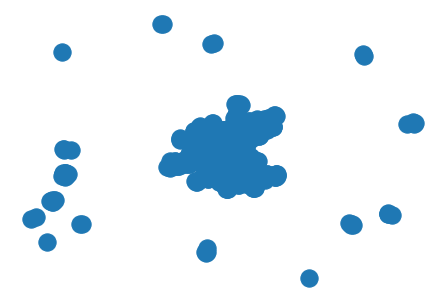

In [24]:
nx.draw(nx_graph2)

In [25]:
nx_graph2.nodes()

NodeView(('cube4_cluster0', 'cube4_cluster1', 'cube4_cluster2', 'cube5_cluster2', 'cube5_cluster1', 'cube5_cluster0', 'cube6_cluster0', 'cube6_cluster1', 'cube6_cluster2', 'cube7_cluster2', 'cube7_cluster1', 'cube7_cluster0', 'cube8_cluster0', 'cube8_cluster2', 'cube8_cluster1', 'cube9_cluster2', 'cube9_cluster0', 'cube9_cluster1', 'cube10_cluster0', 'cube10_cluster1', 'cube10_cluster2', 'cube13_cluster1', 'cube13_cluster0', 'cube13_cluster2', 'cube14_cluster1', 'cube14_cluster0', 'cube14_cluster2', 'cube17_cluster0', 'cube17_cluster2', 'cube17_cluster1', 'cube18_cluster0', 'cube18_cluster1', 'cube18_cluster2', 'cube22_cluster2', 'cube22_cluster1', 'cube22_cluster0', 'cube23_cluster0', 'cube23_cluster2', 'cube23_cluster1', 'cube24_cluster2', 'cube24_cluster0', 'cube24_cluster1', 'cube25_cluster0', 'cube25_cluster2', 'cube25_cluster1', 'cube27_cluster2', 'cube27_cluster0', 'cube27_cluster1', 'cube28_cluster1', 'cube28_cluster0', 'cube28_cluster2', 'cube29_cluster0', 'cube29_cluster1', '

In [0]:
nx_graph2.number_of_nodes()

987

In [41]:
nx_graph2.nodes(data=True)

NodeDataView({'cube4_cluster0': {'membership': [1, 674, 1926, 1928, 3241, 3249, 3292, 3294, 3639, 3641, 4817, 5859, 5861, 6095, 6097, 6290, 6292, 6593, 6595, 6691, 6693, 6957, 6959, 7181, 7214, 7216, 7247, 7249, 7308, 7333, 7335]}, 'cube4_cluster1': {'membership': [24]}, 'cube4_cluster2': {'membership': [574, 1106]}, 'cube5_cluster2': {'membership': [1, 574, 674, 1106, 1378, 2232, 3241, 3249, 3945, 4817, 5739, 6082, 6127, 6198, 6962, 7308]}, 'cube5_cluster1': {'membership': [24]}, 'cube5_cluster0': {'membership': [753, 1498, 1827, 1920, 1922, 1926, 1928, 1983, 2565, 3242, 3250, 3286, 3288, 3292, 3294, 3633, 3635, 3639, 3641, 3972, 4063, 4410, 4411, 5772, 5810, 5853, 5855, 5859, 5861, 6089, 6091, 6095, 6097, 6284, 6286, 6290, 6292, 6542, 6587, 6589, 6593, 6595, 6685, 6687, 6691, 6693, 6951, 6953, 6957, 6959, 7173, 7175, 7179, 7181, 7208, 7210, 7214, 7216, 7241, 7243, 7247, 7249, 7309, 7327, 7329, 7333, 7335]}, 'cube6_cluster0': {'membership': [753, 1498, 1827, 1920, 1922, 1983, 2565, 32

In [137]:
items = list(nx_graph2.nodes().items())
sentences_index = items[0][1]['membership']
sentences_index

[1,
 674,
 1926,
 1928,
 3241,
 3249,
 3292,
 3294,
 3639,
 3641,
 4817,
 5859,
 5861,
 6095,
 6097,
 6290,
 6292,
 6593,
 6595,
 6691,
 6693,
 6957,
 6959,
 7181,
 7214,
 7216,
 7247,
 7249,
 7308,
 7333,
 7335]

In [102]:
degrees = list(nx_graph2.degree())
nx_graph2.degree()['cube4_cluster0']

11

In [0]:
cliques = list(nx.find_cliques(nx_graph2))

In [131]:
 max_val = 0;
for index in range(len(cliques)):
  if max_val < len(cliques[index]):
      max_val = len(cliques[index])
max_val

8

In [0]:
nodes = nx_graph2.nodes()

In [148]:
s = list(nodes['cube4_cluster0']['membership'])
s[0]

1

In [178]:
len(cliques)

1106

In [185]:
cliques[10]

['cube415_cluster1',
 'cube362_cluster0',
 'cube363_cluster0',
 'cube407_cluster1',
 'cube414_cluster0',
 'cube371_cluster1',
 'cube408_cluster0',
 'cube370_cluster2']

In [0]:
max_cliques = []
count = 0;
for index in range(len(cliques)):
  if len(cliques[index]) > 7:
    members = []
    for member in cliques[index]:
        s = list(nodes[member]['membership'])
        count = count + len(s)
        members.append(s)
    max_cliques.append(members)

In [176]:
count

1669468

In [187]:
len(max_cliques)

703

In [0]:
part_cliques = max_cliques[0:10]

In [297]:
ind1=0
for ind in df_new.index:
  if(ind1<10):
    print(ind)
  ind1 = ind1+1

134
135
136
137
138
139
140
141
157
158


In [0]:

sent_cliq = []
for clique in range(len(part_cliques)):
  sent_one_cl = []
  for member in range(len(part_cliques[clique])):
    for sent in part_cliques[clique][member]:
      index_in_list = 0;
      for ind in df_new.index:
        if(index_in_list==sent-1):
          sent_one_cl.append(l_sent_new[ind])
        index_in_list=index_in_list+1  
  sent_cliq.append(sent_one_cl)


In [303]:
sent_cliq[2]

[' в 2015 году киллер открыл огонь по предпринимателю, когда тот направлялся от арбитражного суда к своему автомобилю "кадиллак"',
 ' по её мнению, сотрудники полиции не провели всех необходимых процедур для розыска нападавшего',
 ' и сейчас никто не собирается выносить эту историю, потому что это травмирует детей',
 ' по словам следователей, у врача было право на такие операции по исправлению носа',
 'убитый примат по имени фудуко был вожаком стаи, но почти 10 лет назад его изгнали за дружбу с другим самцом, потерявшим высокий статус',
 ' женщина попыталась сохранить лицо перед супругом, заявив, что партнёр принудил её к близости силой',
 ' начинается всё с передней двери, которую один из сотрудников пытается открыть, но дверная ручка сломана',
 ' каково было удивление врачей, когда им пришлось спасать не человека, а утонувший мобильный телефон',
 ' по её мнению, сотрудники полиции не провели всех необходимых процедур для розыска нападавшего',
 ' и сейчас никто не собирается выносить 

In [0]:
nx_graph2.number_of_edges()

6747

In [0]:
siple_cluster = nx.clustering(nx_graph2)

In [0]:
A = nx.adjacency_matrix(nx_graph2)

In [0]:
num_A=nx.to_numpy_matrix(nx_graph2)
num_A

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
arr_A = np.asarray(num_A)
arr_A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
D = np.diag(arr_A.sum(axis=1))

In [0]:
print(D)

[[11.  0.  0. ...  0.  0.  0.]
 [ 0.  5.  0. ...  0.  0.  0.]
 [ 0.  0.  7. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ...  0.  7.  0.]
 [ 0.  0.  0. ...  0.  0.  7.]]


In [0]:
L = D - arr_A
L

array([[11.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  7.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  7.]])

In [0]:
vals, vecs = np.linalg.eig(L)

In [0]:
vecs = vecs[ :, np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [0]:
vecs[0].size

987

In [0]:
vecs[:,0].real

array([ 2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  2.85088527e-06,  2.85088527e-06,  2.85088527e-06,
        2.85088527e-06,  

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(vecs[:,0:50].real)
colors = kmeans.labels_

In [0]:
colors

array([22, 43, 22, 22, 43, 22, 22, 49, 49, 49, 49, 49, 22, 22, 22, 22, 22,
       22, 22, 29, 22, 22, 22, 22, 22, 22, 22, 49, 49, 49, 49, 26, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 26, 26, 49, 43, 49, 22, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 20, 20, 20, 21, 20, 21, 21, 10,
       21, 22, 43, 22, 22, 49, 22, 22, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       33, 49, 33, 49, 20, 20, 20, 20, 21, 20, 21, 21, 10, 21, 22, 22, 25,
       22, 22, 25, 22, 25, 49, 49, 49,  9, 22, 22, 25, 22, 25, 25, 25, 25,
       25, 26, 26, 26, 26, 26, 26, 49, 49, 49, 49, 49, 49, 49, 26, 26, 26,
       49, 26, 26, 26, 26, 27, 36, 27, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 26, 26, 49, 26, 26, 26, 27, 26, 27, 27, 27, 27, 49, 49,
       22, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,  0, 26, 49,  0,
       49, 27,  0, 20, 27, 21, 20,  0, 21, 10, 21, 49, 22, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 39, 49, 33, 39, 49,  0, 10, 33, 10,  0,
       20, 21, 20,  0, 21